In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from np_to_csv import data_extraction


Using data_extraction funtion statistical data from numpy files can be saved to csv file 

In [192]:
data_extraction('E:/thesis_data/new_data11.10/')

Read the csv file and show the some data 

In [170]:
df = pd.read_csv('C:/Users/aro/my_repos/project_marvel/project_marvel/data/processed/dataset_cony_all_new.csv')
df.head()

,name,mean,median,std_dev,variance,range,iqr,label
0,S005,-0.324166,-0.337280,0.114946,0.013212,0.996050,0.160447,food
1,S005,-0.317930,-0.329869,0.111816,0.012503,0.988722,0.154785,food
2,S005,-0.316479,-0.330902,0.116895,0.013664,0.996652,0.162923,food
3,S005,-0.300330,-0.314351,0.119345,0.014243,0.993214,0.168450,food
4,S005,-0.295705,-0.311607,0.125925,0.015857,0.988204,0.181177,food


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1266 non-null   object 
 1   mean      1266 non-null   float64
 2   median    1266 non-null   float64
 3   std_dev   1266 non-null   float64
 4   variance  1266 non-null   float64
 5   range     1266 non-null   float64
 6   iqr       1266 non-null   float64
 7   label     1266 non-null   object 
dtypes: float64(6), object(2)
memory usage: 79.2+ KB


In [241]:
unique_products = df['name'].unique()
unique_products

array(['S005', 'S001', 'S018', 'S021', 'S022', 'S017'], dtype=object)

In [223]:
# Create a list of column names
cols = ['mean', 'median', 'std_dev', 'variance', 'range', 'iqr']

Boxplot to have a good idea about the spread of data

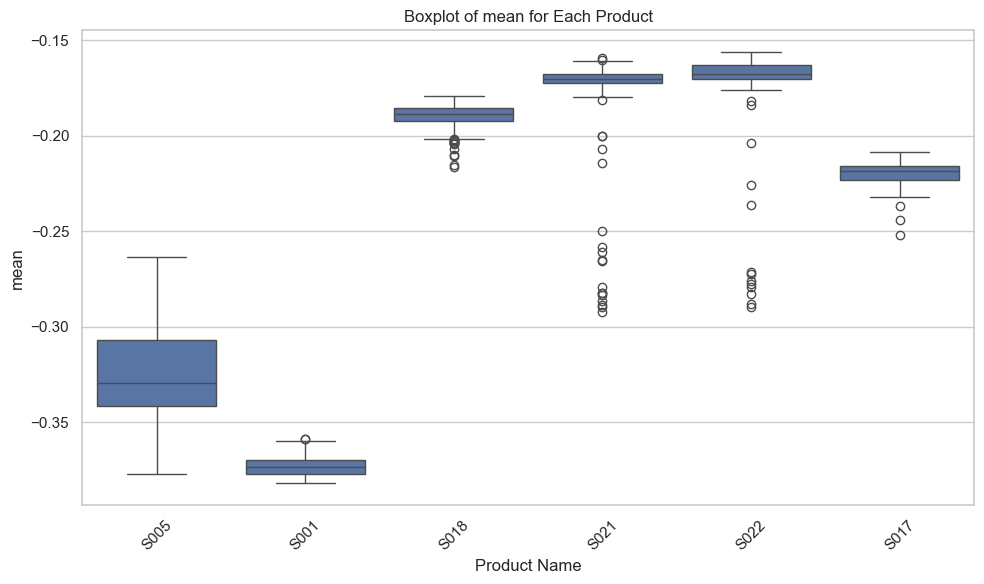

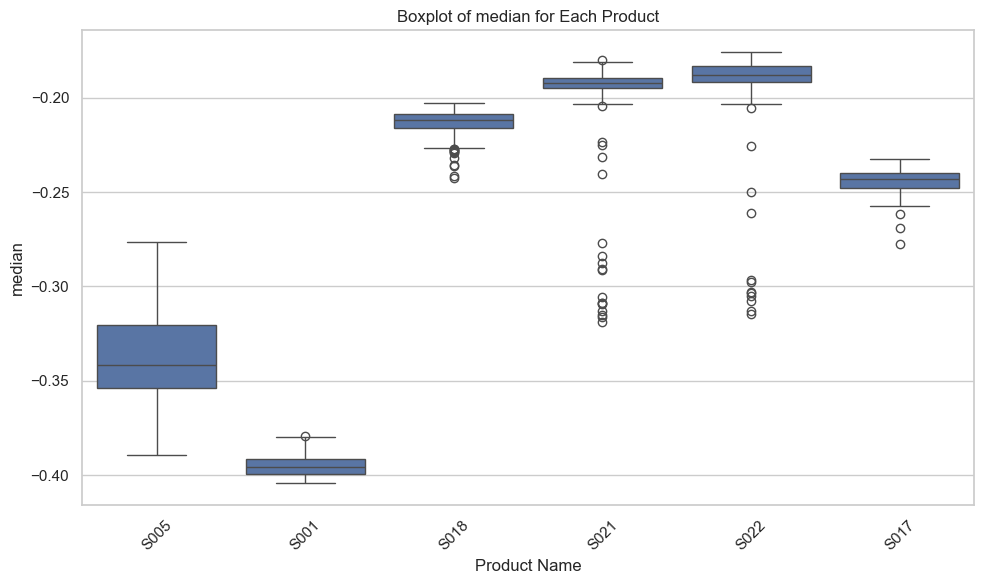

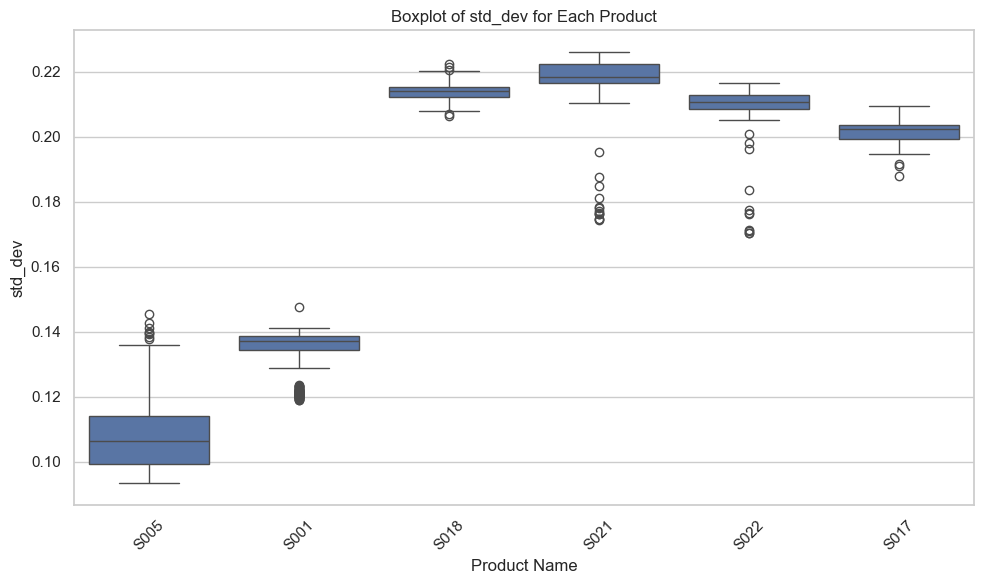

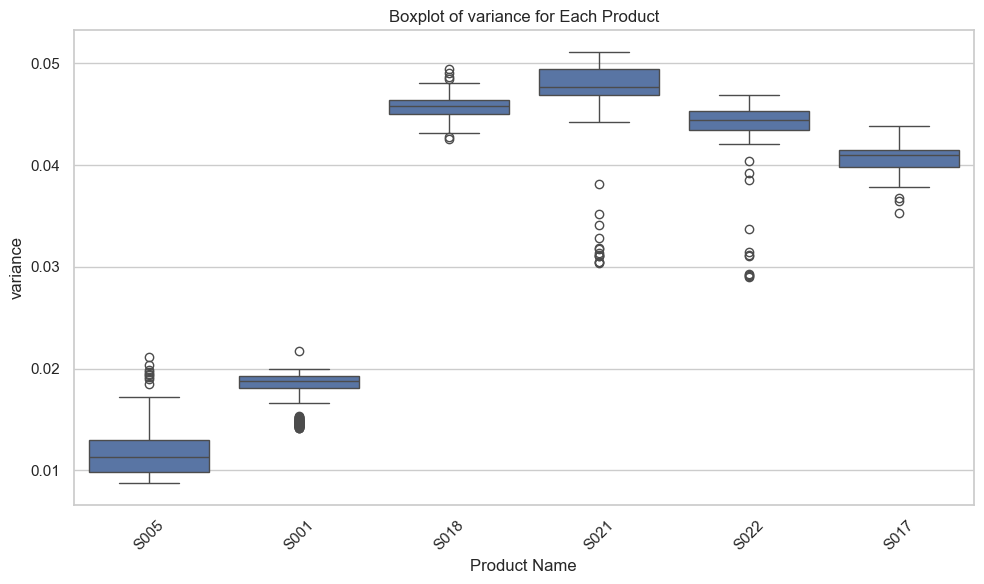

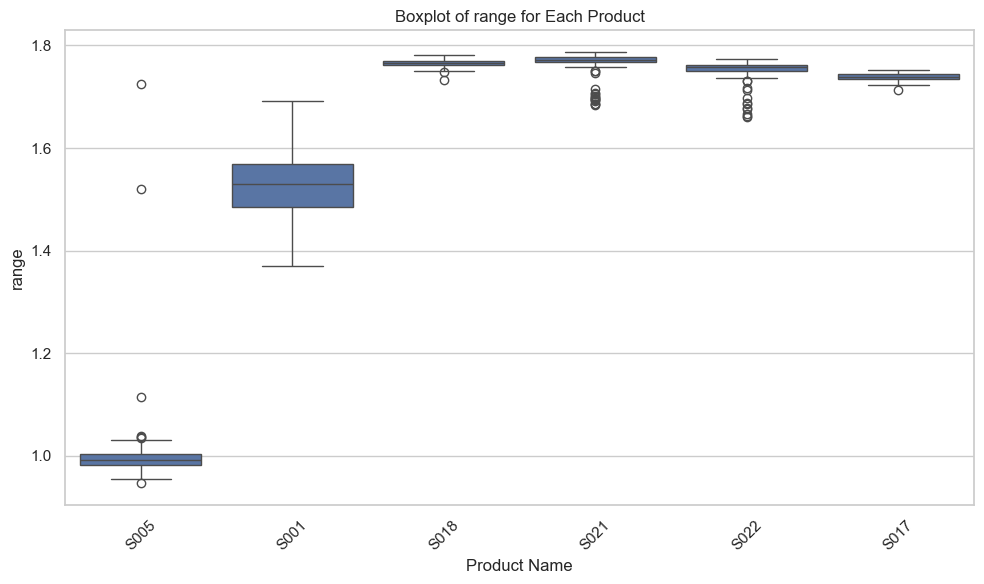

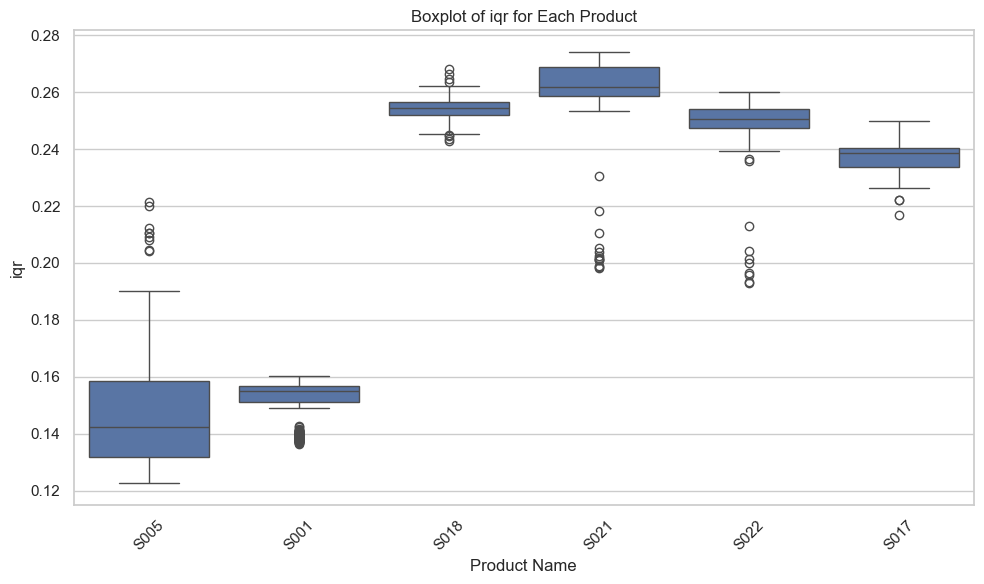

In [224]:
for col in cols:

    # Set figure size
    plt.figure(figsize=(10, 6))

    # Create boxplot for each unique product
    sns.boxplot(data=df, x='name', y=col)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set labels and title
    plt.xlabel('Product Name')
    plt.ylabel(col)
    plt.title('Boxplot of ' + col + ' for Each Product')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [172]:
df.describe()


,mean,median,std_dev,variance,range,iqr
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,-0.265286,-0.285400,0.167073,0.030161,1.509670,0.201835
std,0.085341,0.083717,0.047424,0.015540,0.316481,0.053161
min,-0.381976,-0.404480,0.093332,0.008711,0.946391,0.122525
25%,-0.358116,-0.370647,0.121096,0.014664,1.032508,0.153451
50%,-0.266214,-0.289382,0.177297,0.031434,1.696470,0.210579
75%,-0.173769,-0.196485,0.213827,0.045722,1.763253,0.254396
max,-0.156051,-0.175627,0.226069,0.051107,1.787250,0.274102


In [173]:
df_1 = df.drop(['name'], axis=1)

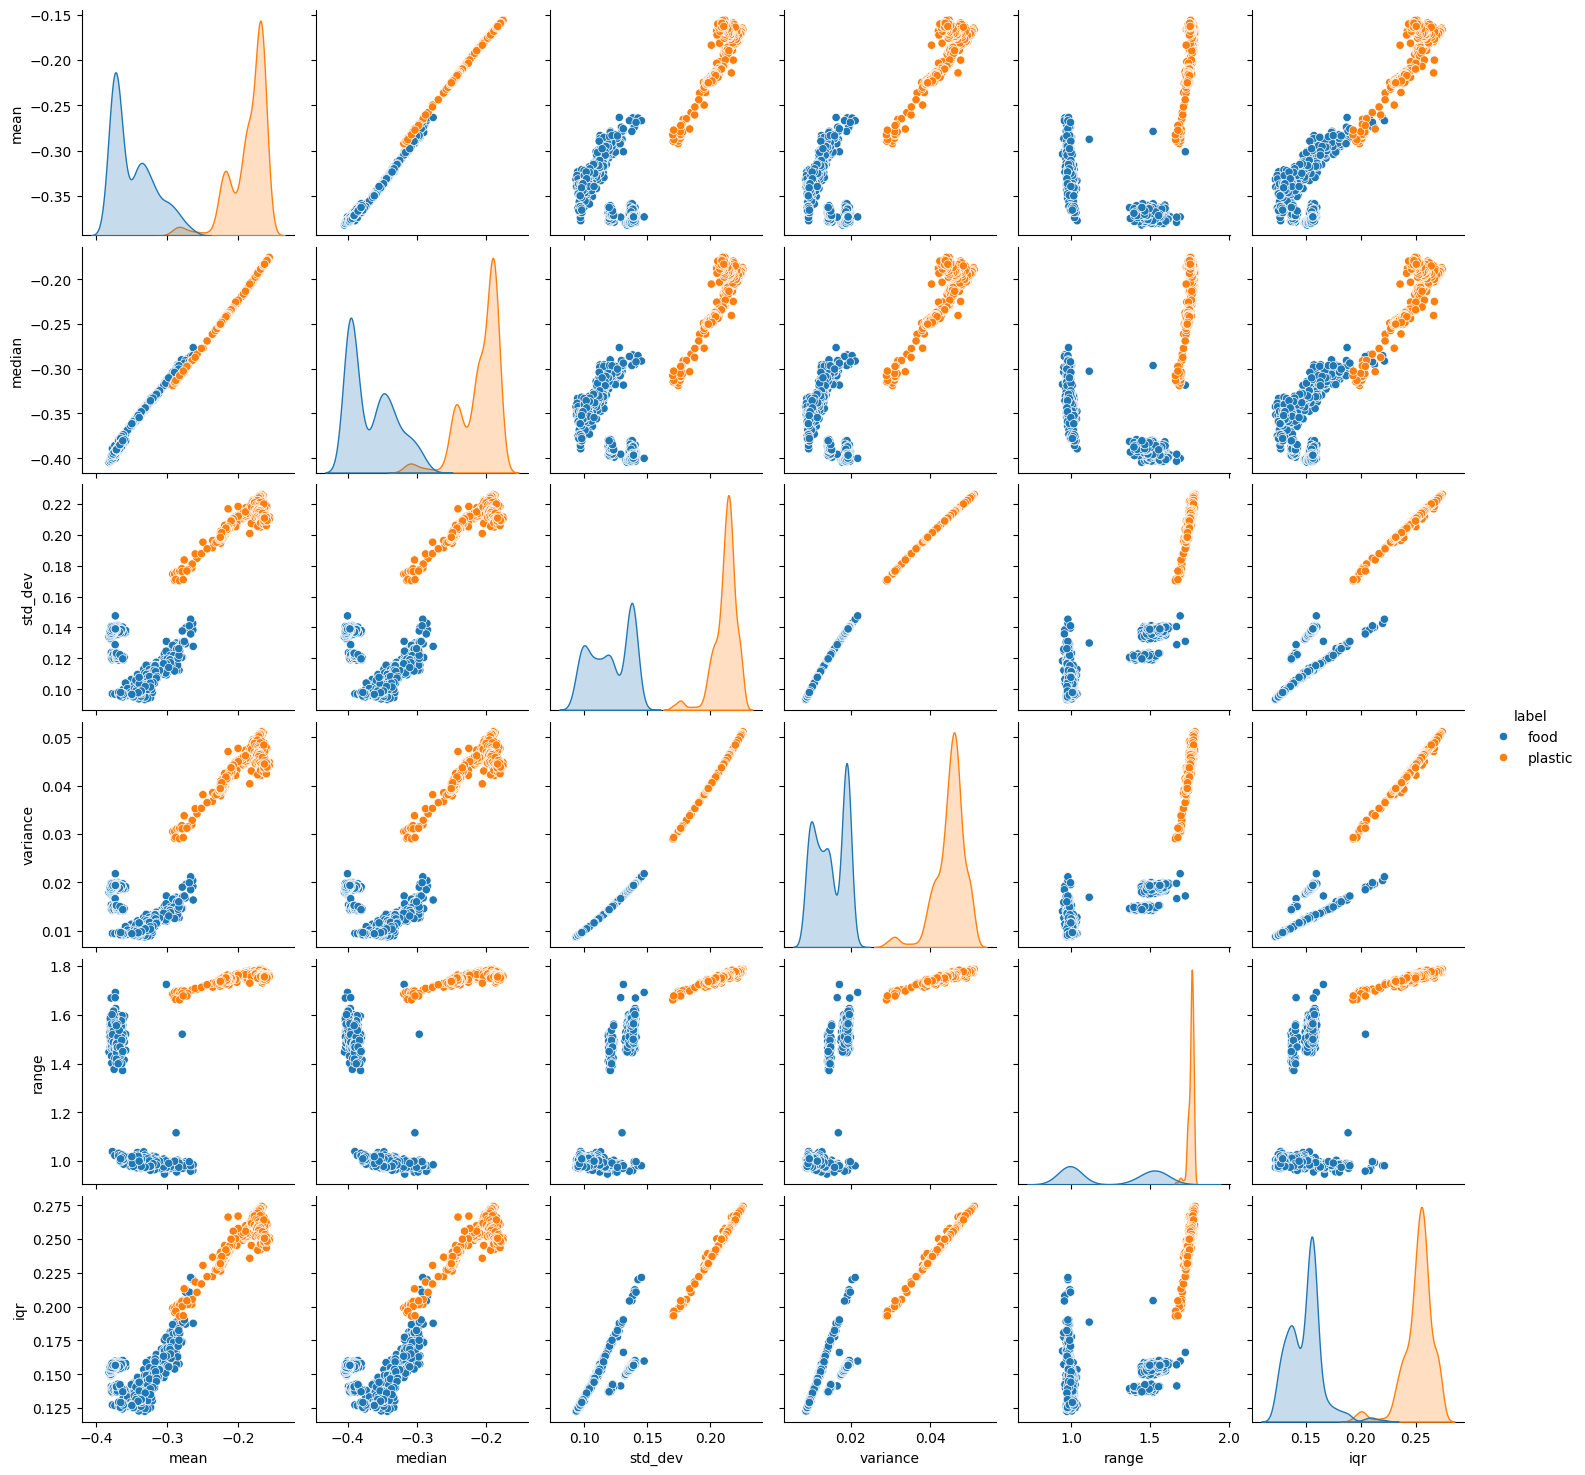

In [199]:
sns.pairplot(df, hue='label')

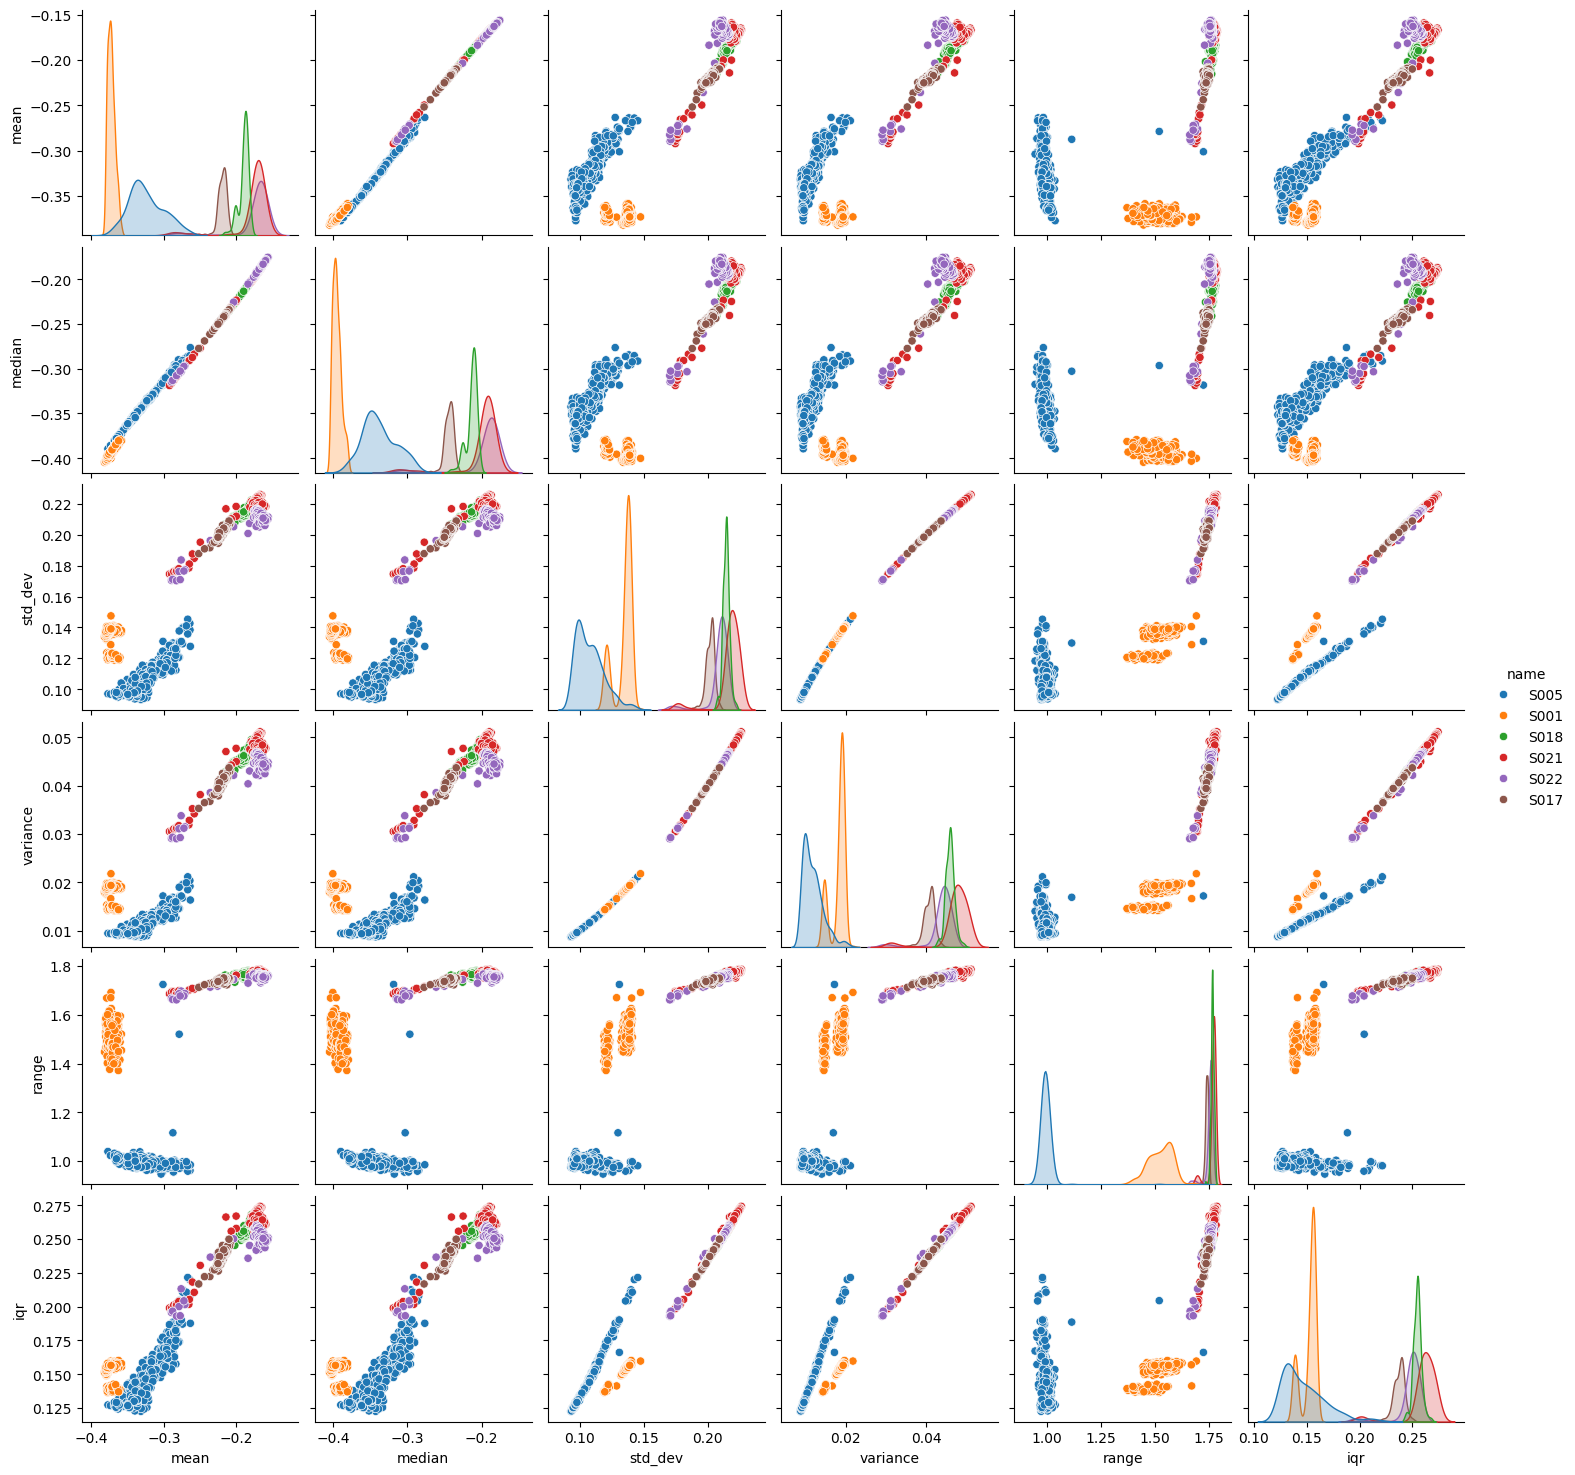

In [198]:
sns.pairplot(df, hue='name')

finding and eliminating outliers

In [285]:
up_l = df[df['name'] == 'S021']['mean'].mean() + 3*df[df['name'] == 'S021']['mean'].std()
low_l = df[df['name'] == 'S021']['mean'].mean() - 3*df[df['name'] == 'S021']['mean'].std()
print(low_l)
print(up_l)

-0.2558687987764888
-0.09783325311880033


In [231]:
df_no_outliers = df[(df['name'] == 'S021') & (df['mean'] < up_l) & (df['mean'] > low_l)]

boxplot of sample S021 before and after removing outliers

<Axes: xlabel='name', ylabel='mean'>

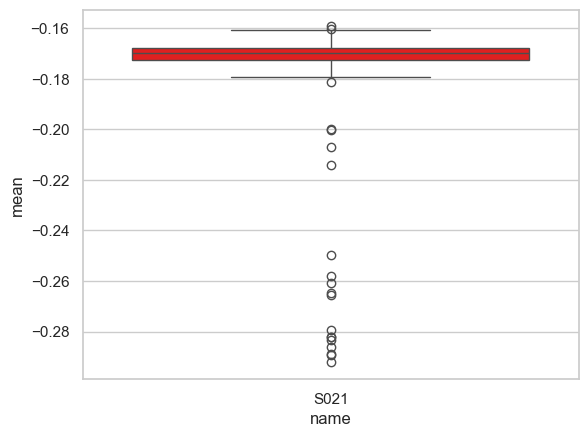

In [237]:
sns.boxplot(x=df.loc[df['name'] == 'S021']['name'], y=df.loc[df['name'] == 'S021']['mean'], color='red')

<Axes: xlabel='name', ylabel='mean'>

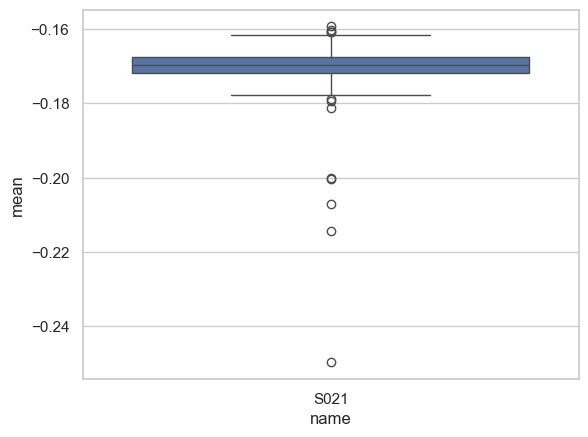

In [238]:
sns.boxplot(data=df_no_outliers, x='name', y='mean')

In [289]:
up_limits = []
low_limits = []
df_no_outliers_list = []

for name in unique_products:
    up_limit = df[(df['name'] == name)]['mean'].mean() + 3 * df[(df['name'] == name)]['mean'].std()
    low_limit = df[(df['name'] == name)]['mean'].mean() - 3 * df[(df['name'] == name)]['mean'].std()
    outliers = df[(df['name'] == name) & (df['mean'] < up_limit) & (df['mean'] > low_limit)]
    df_no_outliers_list.append(outliers)


# Concatenate the DataFrames in df_no_outliers_list into a single DataFrame
df_no_outliers_1 = pd.concat(df_no_outliers_list, ignore_index=True)

print("df_no_outliers DataFrame:", df_no_outliers)


df_no_outliers DataFrame:       name      mean    median   std_dev  variance     range       iqr  \
0     S005 -0.324166 -0.337280  0.114946  0.013212  0.996050  0.160447   
1     S005 -0.317930 -0.329869  0.111816  0.012503  0.988722  0.154785   
2     S005 -0.316479 -0.330902  0.116895  0.013664  0.996652  0.162923   
3     S005 -0.300330 -0.314351  0.119345  0.014243  0.993214  0.168450   
4     S005 -0.295705 -0.311607  0.125925  0.015857  0.988204  0.181177   
...    ...       ...       ...       ...       ...       ...       ...   
1237  S017 -0.215949 -0.240347  0.203936  0.041590  1.743285  0.240860   
1238  S017 -0.216120 -0.240708  0.203466  0.041398  1.742625  0.239978   
1239  S017 -0.217319 -0.242023  0.204383  0.041772  1.751169  0.241925   
1240  S017 -0.223195 -0.248292  0.201448  0.040581  1.738806  0.237052   
1241  S017 -0.225211 -0.250208  0.198479  0.039394  1.736711  0.231765   

        label  
0        food  
1        food  
2        food  
3        food  
4    

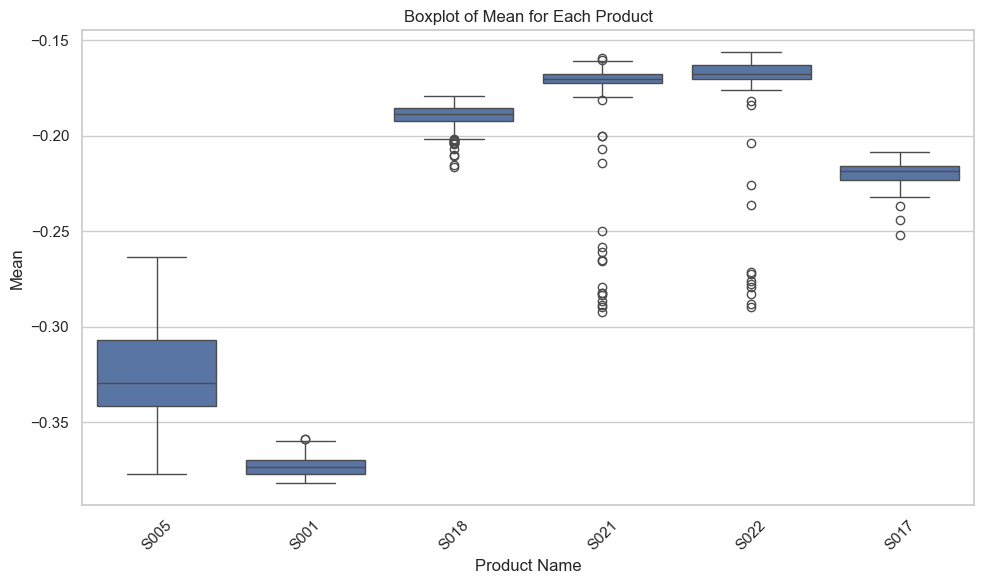

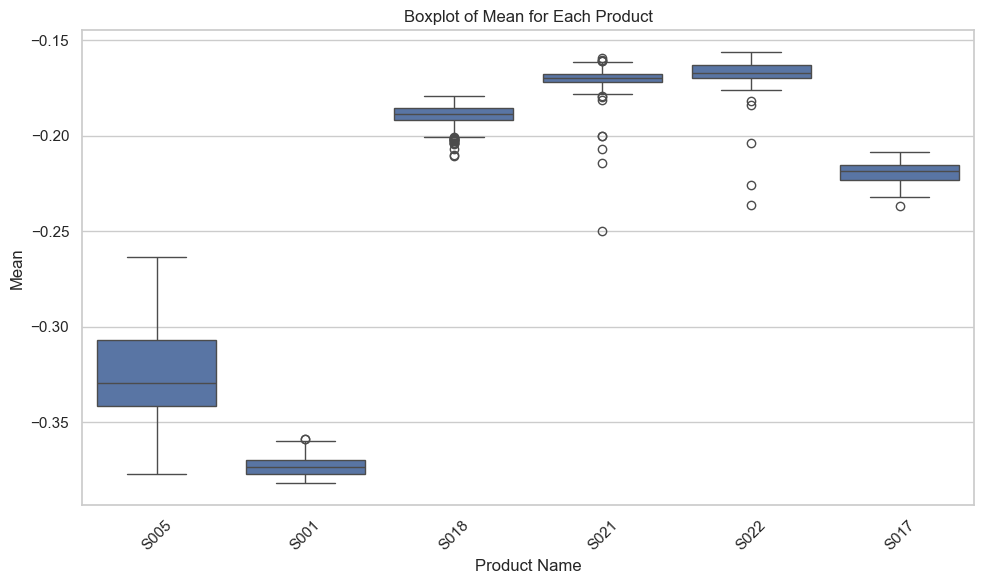

In [304]:
# Set figure size for boxplot
plt.figure(figsize=(10, 6))

# Create boxplot for each unique product
sns.boxplot(data=df, x='name', y='mean')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Product Name')
plt.ylabel('Mean')
plt.title('Boxplot of Mean for Each Product')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot for each unique product
sns.boxplot(data=df_no_outliers_1, x='name', y='mean')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Product Name')
plt.ylabel('Mean')
plt.title('Boxplot of Mean for Each Product')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Scaling and label encoding

In [176]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
 
# Scale the features
scaler = StandardScaler()
df_1[['mean', 'median', 'std_dev', 'variance', 'range', 'iqr']] = scaler.fit_transform(df_1[['mean', 'median', 'std_dev', 'variance', 'range', 'iqr']])


In [177]:
# Encode the labels
le = LabelEncoder()

df_1['label'] = le.fit_transform(df_1['label'])

In [178]:
df_1.describe()

,mean,median,std_dev,variance,range,iqr,label
count,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1.266000e+03,1266.000000
mean,-4.939002e-16,1.347000e-16,-7.184002e-16,-8.980003e-17,-8.980003e-17,-5.388002e-16,0.510269
std,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,1.000395e+00,0.500092
min,-1.367876e+00,-1.422967e+00,-1.555528e+00,-1.380853e+00,-1.780524e+00,-1.492478e+00,0.000000
25%,-1.088181e+00,-1.018676e+00,-9.698666e-01,-9.976027e-01,-1.508308e+00,-9.105029e-01,0.000000
50%,-1.088451e-02,-4.757753e-02,2.156685e-01,8.198378e-02,5.904739e-01,1.645507e-01,1.000000
75%,1.072783e+00,1.062511e+00,9.862496e-01,1.001770e+00,8.015776e-01,9.891108e-01,1.000000
max,1.280479e+00,1.311754e+00,1.244478e+00,1.348434e+00,8.774291e-01,1.359941e+00,1.000000


In [180]:
x = df_1.drop("label" , axis = 1)
y = df_1["label"]

Spliting the data for train and test sets

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size = .20 , random_state=41)

if the there is in balnce in data

In [182]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [183]:
xtrain , ytrain = smt.fit_resample(X_train, y_train)

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(50, 50))

In [185]:
lr.fit(xtrain , ytrain)
dtc.fit(xtrain , ytrain)
rfc.fit(xtrain , ytrain)
gbc.fit(xtrain , ytrain)
mlp.fit(xtrain , ytrain)

MLPClassifier(hidden_layer_sizes=(50, 50))

In [186]:
rfc.score(xtrain , ytrain)

1.0

In [187]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters for each model
logistic_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0]

}

descion_tree_params = {
    'max_depth': [5, 10, 15]
}

mlp_params = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 2000]
}


# Create the GridSearchCV objects for each model
logistic_grid = GridSearchCV(lr, logistic_params, cv=5)
random_forest_grid = GridSearchCV(rfc, random_forest_params, cv=5)
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5)
descion_grid = GridSearchCV(dtc, descion_tree_params, cv=5)
gradient_grid = GridSearchCV(gbc, gradient_boosting_params, cv=5)

# Fit the data to each model
logistic_grid.fit(X_train, y_train)
random_forest_grid.fit(X_train, y_train)
mlp_grid.fit(X_train, y_train)
descion_grid.fit(X_train, y_train)
gradient_grid.fit(X_train, y_train)

# Get the best hyperparameters for each model
best_logistic_params = logistic_grid.best_params_
best_random_forest_params = random_forest_grid.best_params_
best_mlp_params = mlp_grid.best_params_
best_descion_params = descion_grid.best_params_
best_gradient_params = gradient_grid.best_params_

# Create the final models with the best hyperparameters
final_logistic_model = LogisticRegression(**best_logistic_params)
final_random_forest_model = RandomForestClassifier(**best_random_forest_params)
final_mlp_model = MLPClassifier(**best_mlp_params)
final_descion_model = DecisionTreeClassifier(**best_descion_params)
final_gradient_model = GradientBoostingClassifier(**best_gradient_params)

# Fit the data to the final models
final_logistic_model.fit(X_train, y_train)
final_random_forest_model.fit(X_train, y_train)
final_mlp_model.fit(X_train, y_train)
final_descion_model.fit(X_train, y_train)
final_gradient_model.fit(X_train, y_train)

c:\Users\aro\my_repos\project_marvel\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aro\my_repos\project_marvel\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aro\my_repos\project_marvel\.venv\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\aro\my_repos\project_marvel\.venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172,

GradientBoostingClassifier()

In [191]:
print('best parameters for logistic regression: ' , best_logistic_params)
print('best parameters for random forest: ' , best_random_forest_params)
print('best parameters for mlp: ' , best_mlp_params)
print('best parameters for descion tree: ' , best_descion_params)
print('best parameters for gradient boosting: ' , best_gradient_params)

best parameters for logistic regression:  {'C': 0.1, 'penalty': 'l2'}
best parameters for random forest:  {'max_depth': 5, 'n_estimators': 100}
best parameters for mlp:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
best parameters for descion tree:  {'max_depth': 5}
best parameters for gradient boosting:  {'learning_rate': 0.1, 'n_estimators': 100}


In [188]:
train_score = [final_descion_model.score(xtrain , ytrain) , final_random_forest_model.score(xtrain , ytrain) ,final_gradient_model.score(xtrain , ytrain) , final_logistic_model.score(xtrain , ytrain), final_mlp_model.score(xtrain , ytrain)]
test_score =  [final_descion_model.score(X_test , y_test) , final_random_forest_model.score(X_test , y_test) ,final_gradient_model.score(X_test , y_test) ,final_logistic_model.score(X_test , y_test), final_mlp_model.score(X_test , y_test)]

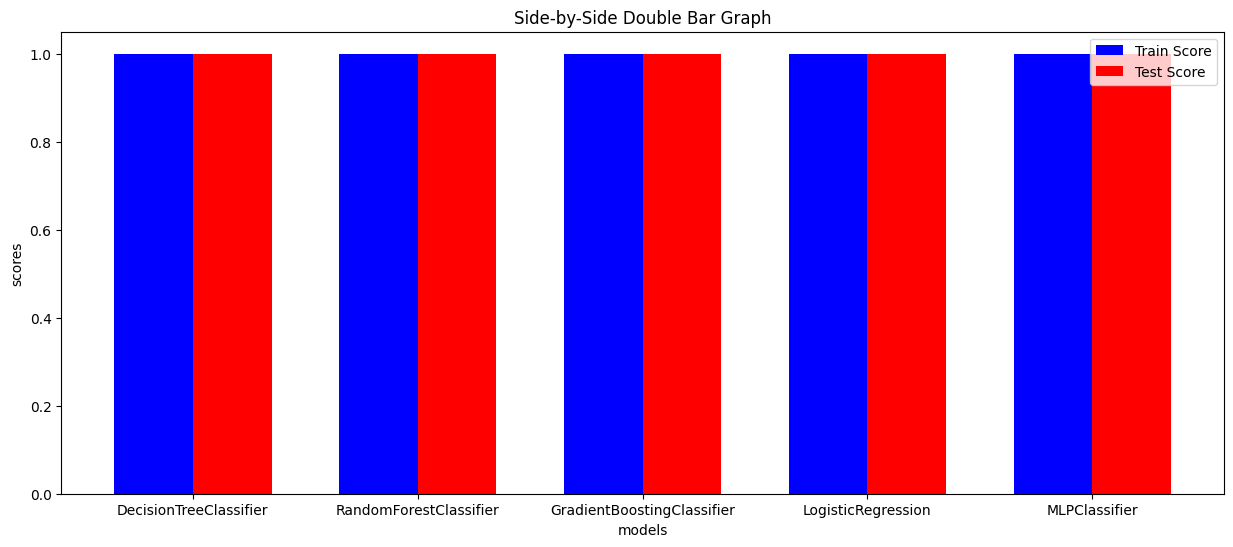

In [189]:
models = ['DecisionTreeClassifier' , 'RandomForestClassifier' , 'GradientBoostingClassifier' , 'LogisticRegression', 'MLPClassifier']

# Set the width of the bars
bar_width = 0.35

# Calculate the position of the bars
x = np.arange(len(models))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15,6))

# Create the first set of bars
ax.bar(x - bar_width/2, train_score, color='blue', width=bar_width, label='Train Score')

# Create the second set of bars
ax.bar(x + bar_width/2, test_score, color='red', width=bar_width, label='Test Score')

# Set the labels and title
ax.set_xlabel('models')
ax.set_ylabel('scores')
ax.set_title('Side-by-Side Double Bar Graph')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add a legend
ax.legend()

# Show the plot
plt.show()
